# Validate the pretrained model
For the same substructure, the contextSub pretrained model should generate similar embeddings when the local environments are similar while different embeddings when the environments are different.

In [1]:
import json
import pickle as pk

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import DrawingOptions
from torch_geometric.data import Batch, DataLoader
from torch_geometric.nn import global_mean_pool
import torch
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import numpy as np
import seaborn as sns
import umap

from contextSub.util import mol_to_graph_data_obj_simple
from contextSub.model import GNN, GNN_graphpred
from contextSub.util import evaluate_pretraining, plot_embedding
from contextSub.loader import MoleculeDataset

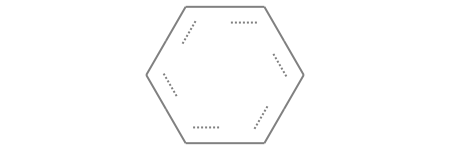

In [6]:
pattern = Chem.MolFromSmarts("c1ccccc1")
pattern

In [7]:
colors = ["green", "#2eac66", "#7ebc57", "#b3cd41", "#dfdd19", "#ffed00"]

## ContextSub without normalized loss or partial charge property

* ### Chemicals classified based on electron affinities

In [20]:
chm = "contextSub/dataset/testing_chemicals.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_2.pth")

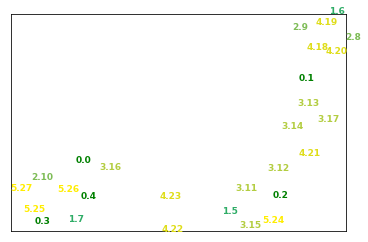

In [21]:
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="text", cmap=colors)

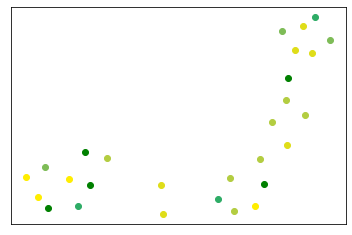

In [22]:
plot_embedding(umap_emb, y, mode="dot", cmap=colors)

* ### Chemicals classified based on surround atom types

In [6]:
chm = "contextSub/dataset/testing_chemicals_surroundings.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_2.pth")

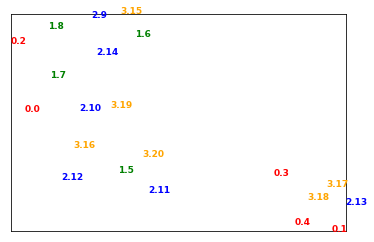

In [8]:
umap_emb = umap.UMAP(n_epochs=300).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="text")

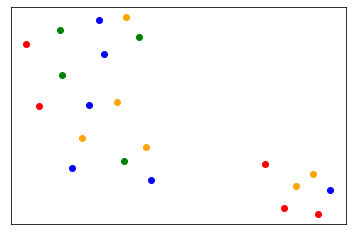

In [9]:
plot_embedding(umap_emb, y, mode="dot")

<AxesSubplot:>

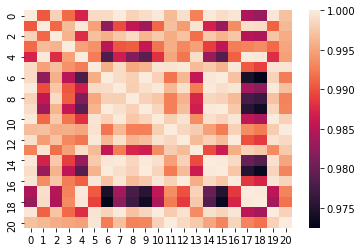

In [10]:
sns.heatmap(cosine_similarity(pattern_embs, pattern_embs))

In [11]:
chm = "contextSub/dataset/testing_chemicals_frame_based.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_2.pth")

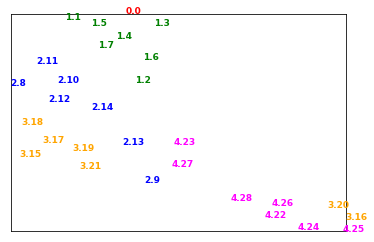

In [12]:
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="text")

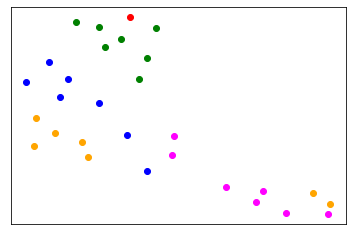

In [13]:
plot_embedding(umap_emb, y, mode="dot")

<AxesSubplot:>

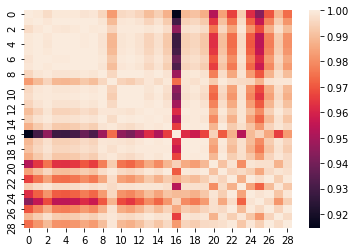

In [14]:
sns.heatmap(cosine_similarity(pattern_embs, pattern_embs))

## ContextPred model without normalized loss or partial charge

* ### Based on chemical electronegativity

In [16]:
chm = "contextSub/dataset/testing_chemicals.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextpred.pth", partial_charge=False)

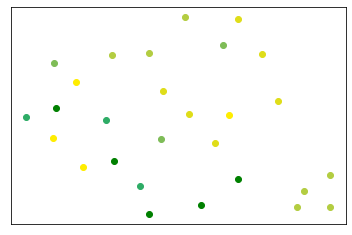

In [17]:
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot", cmap=colors)

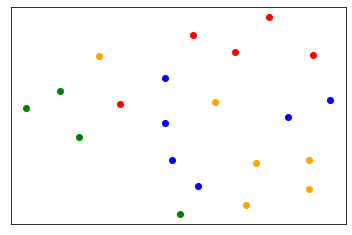

In [25]:
chm = "contextSub/dataset/testing_chemicals_surroundings.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextpred.pth")
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

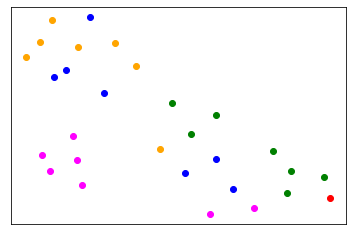

In [26]:
chm = "contextSub/dataset/testing_chemicals_frame_based.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextpred.pth")
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

## ContextSub model with partial charge property AND normalized loss

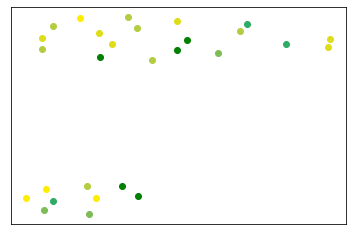

In [29]:
chm = "contextSub/dataset/testing_chemicals.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_partialCharge_and_norm.pth", partial_charge=True)
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot", cmap=colors)

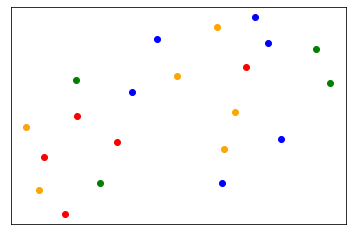

In [31]:
chm = "contextSub/dataset/testing_chemicals_surroundings.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_partialCharge_and_norm.pth", partial_charge=True)
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

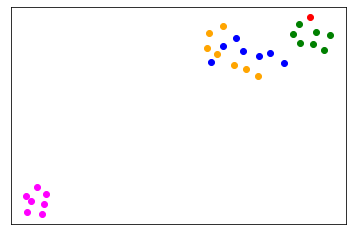

In [42]:
chm = "contextSub/dataset/testing_chemicals_frame_based.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_partialCharge_and_norm.pth", partial_charge=True)
umap_emb = umap.UMAP(n_epochs=500).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

## ContextSub model with partial charge property BUT NO normalized loss

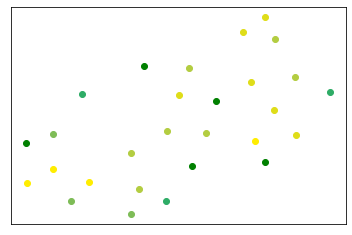

In [44]:
chm = "contextSub/dataset/testing_chemicals.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_partialCharge_no_norm_output.pth", partial_charge=True)
umap_emb = umap.UMAP(n_epochs=500).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot", cmap=colors)

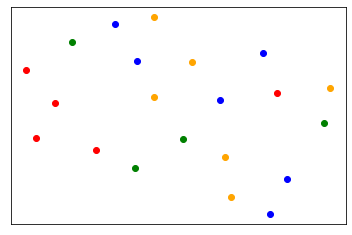

In [53]:
chm = "contextSub/dataset/testing_chemicals_surroundings.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_partialCharge_no_norm_output.pth", partial_charge=True)
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

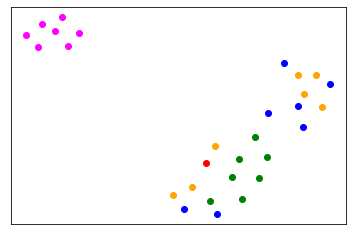

In [37]:
chm = "contextSub/dataset/testing_chemicals_frame_based.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_partialCharge_no_norm_output.pth", partial_charge=True)
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

## ContextSub model with normalized loss BUT NO partial charge property

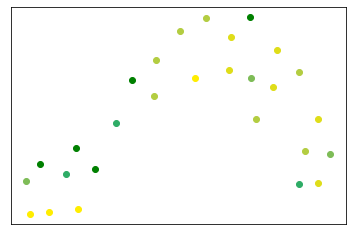

In [57]:
chm = "contextSub/dataset/testing_chemicals.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_norm_output_no_partialCharge.pth")
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot", cmap=colors)

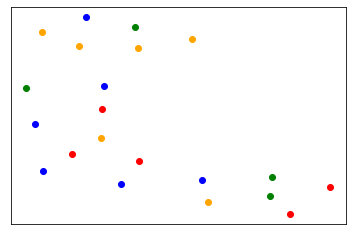

In [58]:
chm = "contextSub/dataset/testing_chemicals_surroundings.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_norm_output_no_partialCharge.pth")
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

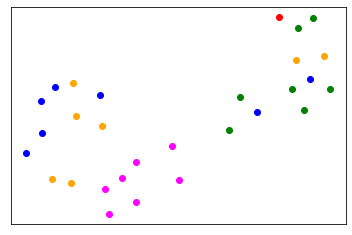

In [60]:
chm = "contextSub/dataset/testing_chemicals_frame_based.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_norm_output_no_partialCharge.pth")
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

## ContextSub model with partial charge property, no output normalization, but with MLP input

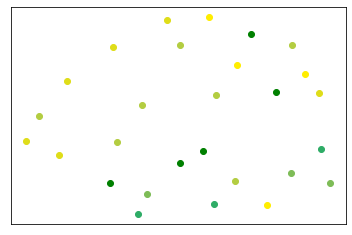

In [4]:
chm = "contextSub/dataset/testing_chemicals.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_partialCharge_no_norm_output_mlp.pth", partial_charge=True, input_mlp=True, node_feat_dim=3, edge_feat_dim=2)
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot", cmap=colors)

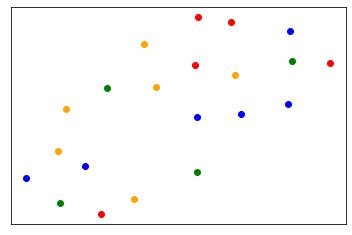

In [6]:
chm = "contextSub/dataset/testing_chemicals_surroundings.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_partialCharge_no_norm_output_mlp.pth", partial_charge=True, input_mlp=True, node_feat_dim=3, edge_feat_dim=2)
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

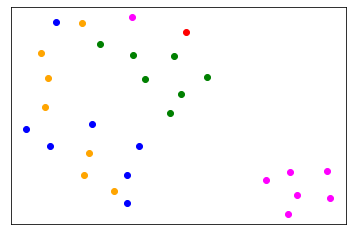

In [38]:
chm = "contextSub/dataset/testing_chemicals_frame_based.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_partialCharge_no_norm_output_mlp.pth", partial_charge=True, input_mlp=True, node_feat_dim=3, edge_feat_dim=2)
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

## No partial charge, no normalization, no mlp, 3 negative sample

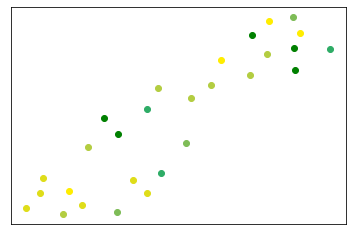

In [9]:
chm = "contextSub/dataset/testing_chemicals.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_moreNegSample_1.pth")
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot", cmap=colors)

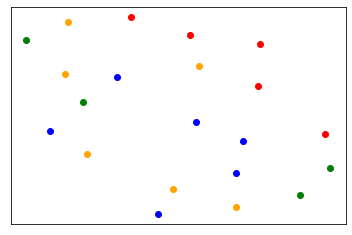

In [12]:
chm = "contextSub/dataset/testing_chemicals_surroundings.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_moreNegSample_1.pth")
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

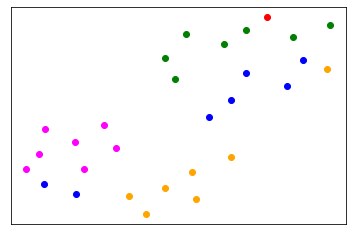

In [13]:
chm = "contextSub/dataset/testing_chemicals_frame_based.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_moreNegSample_1.pth")
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

## No partial charge, no normalization, no mlp, no drop out

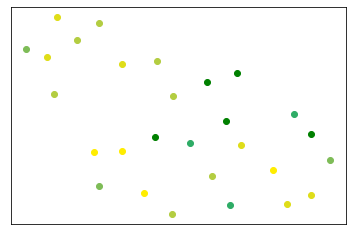

In [14]:
chm = "contextSub/dataset/testing_chemicals.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_nodropout_1.pth")
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot", cmap=colors)

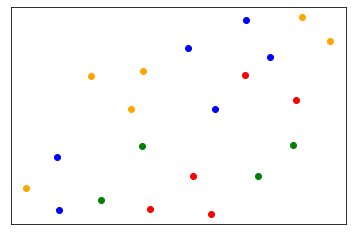

In [15]:
chm = "contextSub/dataset/testing_chemicals_surroundings.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_nodropout_1.pth")
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

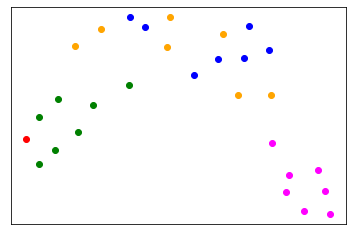

In [36]:
chm = "contextSub/dataset/testing_chemicals_frame_based.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_nodropout_1.pth")
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

## ContextSub model with partial charge property, no output normalization, but with MLP input, 300 epochs

In [2]:
chm = "contextSub/dataset/testing_chemicals.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_partialCharge_no_norm_output_mlp_epoch300.pth", partial_charge=True, input_mlp=True, node_feat_dim=3, edge_feat_dim=2)
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot", cmap=colors)

NameError: name 'pattern' is not defined

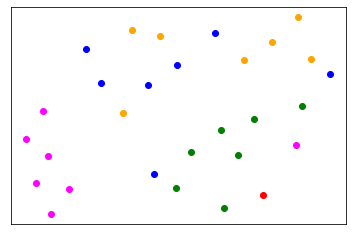

In [8]:
chm = "contextSub/dataset/testing_chemicals_frame_based.json"
pattern_embs, y = evaluate_pretraining(pattern, chm, "contextSub/trained_models/contextSub_chembl_partialCharge_no_norm_output_mlp_epoch300.pth", partial_charge=True, input_mlp=True, node_feat_dim=3, edge_feat_dim=2)
umap_emb = umap.UMAP(n_epochs=1000).fit_transform(pattern_embs)
plot_embedding(umap_emb, y, mode="dot")

## Evaluate the models with context embeddings

In [2]:
model_path = "contextSub/trained_models/contextSub_chembl_partialCharge_and_norm.pth"
model = GNN(
    num_layer=5,
    emb_dim=300,
    JK="last",
    drop_ratio=0.5,
    gnn_type="gin",
    partial_charge=True,
)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [3]:
_ = model.eval()

In [4]:
dataset = MoleculeDataset("contextSub/resources/eval", dataset="evaluation", partial_charge=True, substruct_input=True, context=True)

100%|██████████| 100/100 [1:02:45<00:00, 37.66s/it]
Done!


In [5]:
dataloader = DataLoader(dataset, batch_size=32)

In [14]:
results = []
for batch in dataloader:
    outputs = model(batch.x, batch.edge_index, batch.edge_attr)
    mask = batch.mask.to(torch.bool)[:, 0]
    pooled = global_mean_pool(outputs[mask], batch.batch[mask])
    for row in range(pooled.size(0)):
        results.append(pooled[row].detach().numpy())

In [18]:
results[0].shape

(300,)

In [7]:
batch

Batch(batch=[26652], edge_attr=[56726, 2], edge_index=[2, 56726], id=[2], mask=[26652, 1], substructs=[2], x=[26652, 3], y=[4])

In [8]:
outputs = model(batch.x, batch.edge_index, batch.edge_attr)

In [9]:
mask = batch.mask.to(torch.bool)[:, 0]
outputs[mask].size()

torch.Size([5255, 300])

In [10]:
pooled = global_mean_pool(outputs[mask], batch.batch[mask])

In [12]:
pooled.size()

torch.Size([2, 300])